first we import the modules that we going to use :

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn as sk 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

for each swimmer S, we  have a periode a velocity a flagellum_length and a classe Fresh_only (A), Frozen_only (C) or Blebbed (B)

we merged all data in a file csv and then we use a Dataframe all_data by extracting the file

In [4]:
all_data = pd.read_csv("all_data.csv")

C:\Users\havic\AppData\Local\Temp\ipykernel_11656\3264474877.py:1: DtypeWarning: Columns (2005) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv("all_data.csv")


we calculate the velocity of the swimmer by extracting the min and max amplitude of the mid-point, we then calculte distance between them and finally divide the result by the period of the swimmer 

In [6]:
def Velocity(data):
    Y = data["Unnamed: 1500"]
    P = (np.abs(max(Y)-min(Y))/2)/data["period"].dropna()
    return P.iloc[0]

In [7]:
V = []
for i in range(1,217):
    path = "all_data/"+str(i)+".csv"
    df = pd.read_csv(path)
    Velo = Velocity(df)
    V.append(Velo)



We extracte the class of each swimmer

In [ ]:
classe = pd.read_csv("class.csv")

def func(df,i):
    if df.iloc[i]["fresh"] == 1:
        return "A"
    elif df.iloc[i]["frozen"] == 1 and df.iloc[i]["blebbed"]:
        return "B"
    else: 
        return "C"
    
classe_np = [func(classe,item) for item in range(0,216)]
classe_np


We can plot each swimmer in time with cartersian and polar coor

In [52]:

def ploting_beat_pattern(path, tau=5, polair = False): # the arguments tau and polair can be chosen by the user, if the user don't choose, the arguments gonna take their default_value 
    data = pd.read_csv(path)
    if polair :
        fig, ax1 = plt.subplots(1,subplot_kw=dict(projection='polar'),figsize=(15,15))
    else : 
        fig, ax1 = plt.subplots()
    for i in list(np.linspace(0,len(data)-1,tau).astype(int)):
        data_bis = data.iloc[i]
        i = 1
        j = 1001
        x = []
        y = []
        for a in range (2,1001):
            i += 1
            j += 1
            x.append(data_bis["Unnamed: " + str(i)])
            y.append(data_bis["Unnamed: " + str(j)])
        ax1.plot(x,y)
    plt.savefig("graph.jpeg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


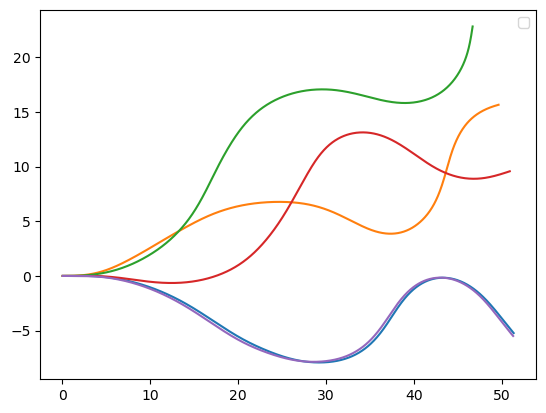

In [53]:
ploting_beat_pattern("all_data/1.csv",5)

We create a new data with the four variable T.P.V.C

In [9]:

New_all_data = pd.DataFrame({"periode" : list(all_data["period"].dropna()),
        "flagellum_length" : list(all_data["flagellum_length"].dropna()),
        "Velocity" : V, 
        "Class" : classe_np})

In [35]:

Class_A = New_all_data[New_all_data["Class"]=="A"]
Class_B = New_all_data[New_all_data["Class"]=="B"]
Class_C = New_all_data[New_all_data["Class"]=="C"]

Here we use K-mean cluster to classifie data 

In [19]:
def find_periode(data):

    Y = list(data["Unnamed: 1502"])

    Y = pd.Series(Y)
    x =np.linspace(0,99,100)
    plt.scatter(x,Y)
    f = Y
    g = x*0 +Y.mean()
    plt.plot(x, g)

    idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
    plt.plot(x[idx], f[idx], 'ro')
    plt.show()
    print(x[idx],f[idx])
    return max(x[idx])-min(x[idx])

Here we classifie our data by K_mean cluster to find the cut-off

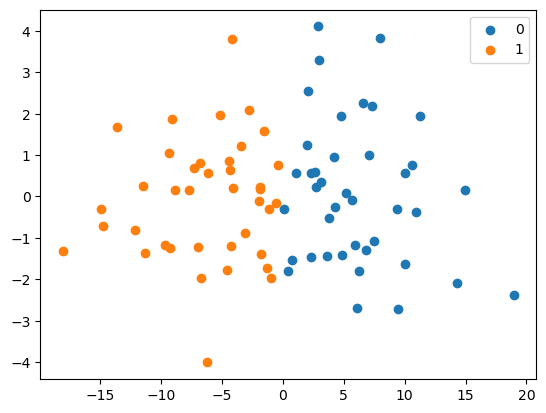

In [37]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.datasets import load_digits

fig, ax = plt.subplots()

Class = Class_A

SpeSpe_fresh = Class[["Velocity","periode","flagellum_length"]]
a = np.array([SpeSpe_fresh.iloc[0]])

for i in range(1,len(Class)):
    a = np.vstack([a,SpeSpe_fresh.iloc[i]])

pca = PCA(2)
df = pca.fit_transform(a)


kmeans = KMeans(n_clusters= 2)
#predict the labels of clusters.
label = kmeans.fit_predict(df)

u_labels = np.unique(label)

for i in u_labels:
    ax.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    
plt.legend()


In [41]:
ind = []
for i in list(range(0,len(Class))):
    if label[i] == 1:
            ind.append(i)

Periode , Flag , Velo = [], [], []

for i in ind:

    Periode.append(Class["periode"].iloc[i])
    Flag.append(Class["flagellum_length"].iloc[i])
    Velo.append(Class["Velocity"].iloc[i])

Grp_2 = pd.DataFrame({"periode":Periode,
                            "flagellum_length": Flag,
                            "Velocity": Velo})


In [43]:
Grp_1.describe()

,periode,flagellum_length,Velocity
count,40.000000,40.000000,40.000000
mean,0.202764,58.173013,44.078559
std,0.043816,1.725262,4.244254
min,0.149010,54.231100,38.068664
25%,0.172717,57.304925,40.752366
50%,0.192480,58.261650,43.428356
75%,0.220415,59.711750,46.251719
max,0.360120,60.943200,57.003777


In [44]:
Grp_2.describe()

,periode,flagellum_length,Velocity
count,39.000000,39.000000,39.000000
mean,0.208238,58.669241,31.746884
std,0.061264,1.476622,4.508531
min,0.124180,54.724900,19.988256
25%,0.161430,57.744200,28.808066
50%,0.192480,58.506100,32.756390
75%,0.242150,59.844850,35.594246
max,0.360120,62.602800,37.588438
